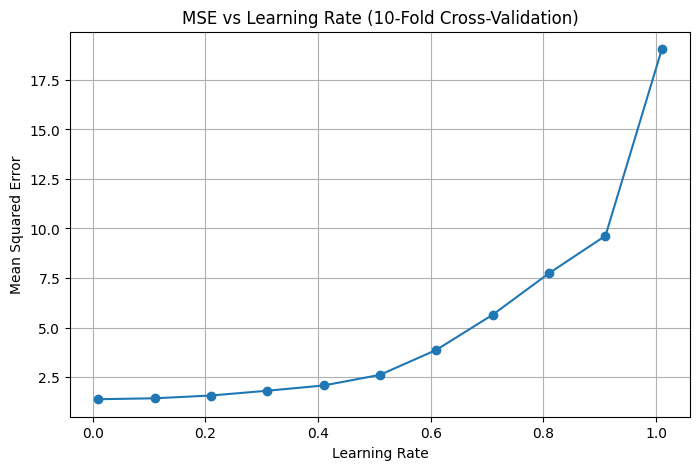

Best Learning Rate: 0.01
Cross-Validation MSE: 1.378840757159842
Test MSE: 1.31695093517327


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

# Load the dataset
train_inputs = pd.read_csv("regression-dataset/train_inputs.csv")
train_targets = pd.read_csv("regression-dataset/train_targets.csv").values.ravel()  # Convert targets to 1D array

# Define range of learning rates
learning_rates = np.arange(0.01, 1.1, 0.1)

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

mse_values = []  # Store mean squared errors for each learning rate

for lr in learning_rates:
    model = SGDRegressor(learning_rate='constant', eta0=lr, max_iter=1000, tol=1e-3, random_state=42)
    mse = -cross_val_score(model, train_inputs, train_targets, cv=kf, scoring='neg_mean_squared_error').mean()
    mse_values.append(mse)

# Find best learning rate
best_lr_index = np.argmin(mse_values)
best_learning_rate = learning_rates[best_lr_index]
best_mse = mse_values[best_lr_index]

# Train final model using best learning rate
final_model = SGDRegressor(learning_rate='constant', eta0=best_learning_rate, max_iter=1000, tol=1e-3, random_state=42)
final_model.fit(train_inputs, train_targets)

# Compute test MSE
final_predictions = final_model.predict(train_inputs)
test_mse = mean_squared_error(train_targets, final_predictions)

# Plot Learning Rate vs MSE
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, mse_values, marker='o', linestyle='-')
plt.xlabel("Learning Rate")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Learning Rate (10-Fold Cross-Validation)")
plt.grid()
plt.show()

# Print results
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Cross-Validation MSE: {best_mse}")
print(f"Test MSE: {test_mse}")
